<a href="https://colab.research.google.com/github/RohitKarake/pytorch_tutorials/blob/main/CNN_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Convert MNIST Image Files into a Tensor of 4-Dimensions (No. of images, Height, Width, Channels)
transform = transforms.ToTensor()

In [3]:
# Train Data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 53.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.69MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.54MB/s]


In [4]:
# Test Data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [25]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
# Create a small batch size for images (10 images)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=True)

In [7]:
# Define our CNN Model
# Describe on convolutional layer and what its doing (2 conv layers)

conv1 = nn.Conv2d(1, 6, 3, 1)   #number of input channels, number of kernels, kernel size, stride
conv2 = nn.Conv2d(6, 16, 3, 1)

In [ ]:
## For grey scale image number of input channels = 1
## For RGB image number of input channels = 3

In [8]:
# Grab 1 MNIST record/image
for i, (X_Train, y_train) in enumerate(train_data):
  break

In [9]:
X_Train.shape

torch.Size([1, 28, 28])

In [10]:
# reshape to 4d
x = X_Train.view(1,1,28,28)  #(number of images, channels, height, width)

In [11]:
# Perform our first convolution
x = F.relu(conv1(x))

In [12]:
x.shape

torch.Size([1, 6, 26, 26])

In [13]:
# pass through pooling layer
x = F.max_pool2d(x, 2, 2)  # kernal of 2 and stride of 2

In [14]:
x.shape

torch.Size([1, 6, 13, 13])

In [15]:
x = F.relu(conv2(x))

In [16]:
x.shape

torch.Size([1, 16, 11, 11])

In [17]:
x = F.max_pool2d(x, 2, 2)
x.shape

torch.Size([1, 16, 5, 5])

In [18]:
# Model Class
class CNN_Neural_Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 80)
    self.fc3 = nn.Linear(80, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)

    #re-view to flatten the previous layer
    X = X.view(-1, 5*5*16)

    #Fully connected layer
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)

In [20]:
torch.manual_seed(41)
model = CNN_Neural_Network()
model

CNN_Neural_Network(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
)

In [21]:
# Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [22]:
import time
start_time = time.time()
epoch = 10
train_loss = []
test_loss = []
train_correct = []
test_correct = []

for i in range(epoch):
  trn_corr = 0
  tst_corr = 0
  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    predicted = torch.max(y_pred, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%600 == 0:
      print(f'epoch: {i} batch: {b} loss: {loss.item()}')
  train_loss.append(loss)
  train_correct.append(trn_corr)

  #Test Data
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val, 1)[1]
      tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_loss.append(loss)
    test_correct.append(tst_corr)

current_time = time.time()
time_elapsed = current_time - start_time
print(f'{time_elapsed/60} minutes')

epoch: 0 batch: 600 loss: 0.42363038659095764
epoch: 0 batch: 1200 loss: 0.13517162203788757
epoch: 0 batch: 1800 loss: 0.08646711707115173
epoch: 0 batch: 2400 loss: 0.019638050347566605
epoch: 0 batch: 3000 loss: 0.11082316935062408
epoch: 0 batch: 3600 loss: 0.1635095626115799
epoch: 0 batch: 4200 loss: 0.15705910325050354
epoch: 0 batch: 4800 loss: 0.024286070838570595
epoch: 0 batch: 5400 loss: 0.00040444801561534405
epoch: 0 batch: 6000 loss: 0.010546172969043255
epoch: 1 batch: 600 loss: 0.005669584032148123
epoch: 1 batch: 1200 loss: 0.02064889296889305
epoch: 1 batch: 1800 loss: 0.0010841143084689975
epoch: 1 batch: 2400 loss: 0.02077571675181389
epoch: 1 batch: 3000 loss: 0.0024572669062763453
epoch: 1 batch: 3600 loss: 0.02407272532582283
epoch: 1 batch: 4200 loss: 0.005896934308111668
epoch: 1 batch: 4800 loss: 0.003934015519917011
epoch: 1 batch: 5400 loss: 0.011879149824380875
epoch: 1 batch: 6000 loss: 0.006053473800420761
epoch: 2 batch: 600 loss: 0.06685416400432587
ep

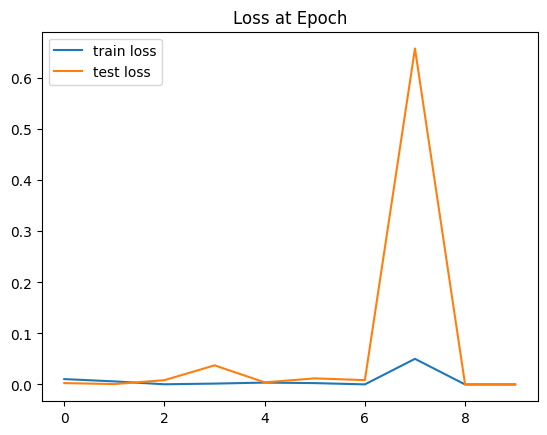

In [23]:
# Graph loss vs epoch
train_losses = [tl.item() for tl in train_loss]
test_losses = [tl.item() for tl in test_loss]
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.title("Loss at Epoch")
plt.legend()

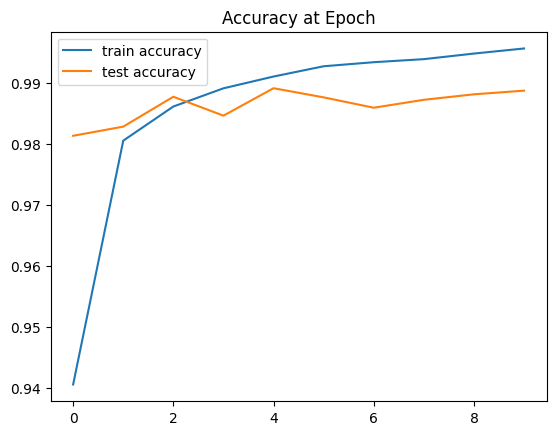

In [26]:
# Graph accuracy at end of each epoch
plt.plot([t/60000 for t in train_correct], label='train accuracy')
plt.plot([t/10000 for t in test_correct], label='test accuracy')
plt.title("Accuracy at Epoch")
plt.legend()

In [27]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [28]:
with torch.no_grad():
  correct= 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()
  print(f'Test Accuracy: {correct/10000}')


Test Accuracy: 0.9886999726295471
